In [116]:
from cctbx import miller
import iotbx
from iotbx.reflection_file_reader import any_reflection_file
import io

reference = {}
# Add a lonely oxygen atom to the reference cif file so cctbx will read it properly. A dirty hack.
with open('test_data/cusp/5deg/5deg_auto.cif', 'r+') as f:
    f.seek(0)
    if '_atom_site_label' not in f.read():
        f.write('''
loop_
  _atom_site_label
  _atom_site_type_symbol
  _atom_site_fract_x
  _atom_site_fract_y
  _atom_site_fract_z
  _atom_site_U_iso_or_equiv
  O O 0.0 0.0 0.0 1
''')
                        
reference['name'], reference['structure'] = iotbx.cif.reader('test_data/cusp/5deg/5deg_auto.cif').build_crystal_structures().popitem()

reference['reflections'] = iotbx.reflection_file_reader.any_reflection_file('test_data/cusp/5deg/5deg_auto.hkl' + '=hklf4').as_miller_arrays(reference['structure'])[0].merge_equivalents().array()

print(list(reference['reflections'].as_amplitude_array().normalize()))


[((3, 1, 0), 3.2744024932005686), ((3, 1, 2), 0.503121256751235), ((3, 1, 3), 0.07064813571377593), ((3, 3, 2), 0.995191849162644), ((3, 3, 3), 0.0), ((3, 3, 6), 0.7418562581649042), ((4, 0, 3), 0.6953206232587408), ((4, 0, 4), 1.8679324447754866), ((4, 1, 3), 1.6787643064892914), ((4, 1, 4), 1.000901823893034), ((4, 1, 5), 1.9497677132771636), ((4, 2, 3), 0.27164084864589744), ((4, 2, 6), 1.3250952717065663), ((4, 2, 7), 0.5869020216383329), ((4, 3, 8), 0.2921867459086664), ((4, 3, 9), 0.0), ((4, 3, 10), 0.25087649254068317), ((5, 0, 1), 0.5754840301009925), ((5, 0, 4), 1.092948046165209), ((5, 0, 5), 0.6147285007830542), ((5, 1, 2), 0.4333458386235654), ((5, 1, 3), 0.7256633911439572), ((5, 1, 4), 0.7372418415830898), ((5, 1, 6), 0.39801251234108387), ((5, 1, 7), 0.1262163079005179), ((5, 2, 3), 0.6140991147776582), ((5, 2, 6), 0.3572173508911198), ((5, 2, 7), 0.07275864406357908), ((5, 2, 8), 0.5945173277525237), ((5, 2, 9), 0.12036137460731253), ((5, 3, 4), 3.3933095547802536), ((5

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

In [170]:
import structure_match, importlib, pickle
from pathlib import Path

importlib.reload(structure_match)

reslimits = [(999, float(i)) for i in [8, 7, 6, 5, 4, 3, 2, 1.5, 1.25, 1, 0.9, 0.8]]

distance_metrics = [structure_match.StructureMatch.r_factor_distance,
                    structure_match.StructureMatch.cosine_distance,
                    structure_match.StructureMatch.euclidean_distance,
                    structure_match.StructureMatch.chebyshev_distance,
                    structure_match.StructureMatch.cityblock_distance,
                    structure_match.StructureMatch.braycurtis_distance,
                    structure_match.StructureMatch.canberra_distance,
                    structure_match.StructureMatch.jensenshannon_distance,
                    structure_match.StructureMatch.minkowski_distance
                    ]
results = {}

for distance_metric in distance_metrics:
    print(f"Calculating distances using {distance_metric.__name__}")
    results[distance_metric.__name__] = {}

    for reslimit in reslimits:
        print(f"Calculating structure factors using resolution {str(reslimit)}")
        results[distance_metric.__name__][float(reslimit[1])] = structure_match.StructureMatch().compare_fs(
            Path('test_data/th5/exp_sx.hkl'), 
            Path('test_data/th5/exp.cif'), 
            Path('test_data/th5/').glob('*.cif'), 
            similarity_function=distance_metric,
            resolution_limit=reslimit)

with open('resolution_analysis_results', 'wb') as file:
    pickle.dump(results, file)

Calculating distances using r_factor_distance
Calculating structure factors using resolution (999, 8.0)
Calculating structure factors using resolution (999, 7.0)
Calculating structure factors using resolution (999, 6.0)
Calculating structure factors using resolution (999, 5.0)
Calculating structure factors using resolution (999, 4.0)
Calculating structure factors using resolution (999, 3.0)
Calculating structure factors using resolution (999, 2.0)
Calculating structure factors using resolution (999, 1.5)
Calculating structure factors using resolution (999, 1.25)
Calculating structure factors using resolution (999, 1.0)
Calculating structure factors using resolution (999, 0.9)
Calculating structure factors using resolution (999, 0.8)
Calculating distances using cosine_distance
Calculating structure factors using resolution (999, 8.0)
Calculating structure factors using resolution (999, 7.0)
Calculating structure factors using resolution (999, 6.0)
Calculating structure factors using res

dict_keys(['r_factor_distance', 'cosine_distance', 'euclidean_distance', 'chebyshev_distance', 'cityblock_distance', 'braycurtis_distance', 'canberra_distance', 'jensenshannon_distance', 'minkowski_distance'])
                           8.0       6.0       4.0       3.0       2.0  \
100020030612864.cif   0.000152  0.000420  0.005396  0.007467  0.012457   
100020030046281.cif   0.007543  0.012648  0.028101  0.052972  0.065598   
1000200314819470.cif  0.007963  0.090075  0.084203  0.093123  0.178794   
100020030145705.cif   0.009198  0.040198  0.105411  0.122465  0.130358   
100020030885299.cif   0.073082  0.083200  0.083670  0.123406  0.235257   
...                        ...       ...       ...       ...       ...   
100020030157743.cif   0.222341  0.380956  0.446497  0.715029  0.511734   
100020030154320.cif   0.243235  0.435852  0.582901  0.729831  0.609659   
10002003015209.cif    0.005509  0.344303  0.512508  0.784942  0.624592   
1000200301511631.cif  0.056860  0.067572  0.447288

f:\data\postdoc\csp-search\structure_match\.conda\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


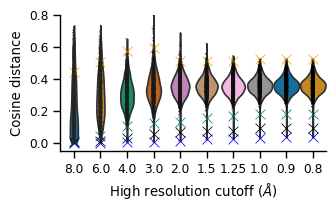

In [8]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



fig, ax2 = plt.subplots(1,1,figsize=(3.45,2.2))

with open('resolution_analysis_results', 'rb') as file:
    all_results = pickle.load(file)

print(all_results.keys())

# results = all_results['r_factor_distance']

# df = pd.DataFrame(columns=[str(i) for i in results.keys()], index=results[1].keys())

# for reso, resu in results.items():
#     df[str(reso)] = resu.values()

# sns.violinplot(df.drop(['7.0','5.0'], axis=1), inner='points', ax=ax1, cut=0, palette=sns.color_palette("husl", 9))
# ax1.get_xaxis().set_visible(False)
# ax1.set_ylabel(r'R-factor')
# sns.scatterplot(dict(df.loc['exp.cif'].drop(['7.0', '5.0'])), ax=ax1, color='red', marker='_', s=1000)
# ax1.set_ylim(-0.20,2)

results = all_results['cosine_distance']

df = pd.DataFrame(columns=[str(i) for i in results.keys()], index=results[1].keys())

for reso, resu in results.items():
    df[str(reso)] = resu.values()

df = df.drop(['7.0','5.0'], axis=1).drop(['exp.cif', 'exp_false_1.cif', 'exp_false_2.cif', 'exp_false_3.cif'])
print(df.sort_values('3.0'))

sns.violinplot(df, inner=None, ax=ax2, cut=0, palette=sns.color_palette("colorblind", 8), width=0.95)
sns.stripplot(df, alpha=0.5, color='black', size=1, jitter=0.05)
ax2.set_xlabel(r'High resolution cutoff ($\AA$)')
ax2.set_ylabel(r'Cosine distance')
sns.scatterplot(dict(df.loc['100020030612864.cif']), ax=ax2, color='blue', marker='x', s=50)
sns.scatterplot(dict(df.loc['100020030145705.cif']), ax=ax2, color='teal', marker='x', s=50)
sns.scatterplot(dict(df.loc['100020030146709.cif']), ax=ax2, color='orange', marker='x', s=50)
sns.scatterplot(dict(df.loc['100020030046281.cif']), ax=ax2, color='black', marker='x', s=50)
ax2.set_ylim(-0.05,0.8)

fig.tight_layout()
sns.despine()
sns.set_context('paper')


In [264]:
import structure_match, importlib, pickle
from pathlib import Path
import numpy as np
import io

importlib.reload(structure_match)

reslimits = [(999, float(i)) for i in [4, 3, 2, 1.5, 1.25, 1, 0.9, 0.8]]

distance_metrics = [structure_match.StructureMatch.cosine_distance]

results = {}

for i in np.arange(0,3.5,0.5):
    hkl = pd.read_fwf(Path('test_data/th5/exp_sx.hkl'), names=['h', 'k', 'l', 'i', 's', 'b', 'p0', 'p1', 'p2'])
    hkl['i'] = hkl['i'] + hkl['i']*np.random.normal(loc=0, scale=i, size=len(hkl['i']))
    with open(Path('test_data/th5/exp_sx_tmp.hkl'), 'w') as f:
        for row in hkl.index:
            f.write(f"{hkl['h'][row]:4}{hkl['k'][row]:4}{hkl['l'][row]:4}{int(hkl['i'][row]):8}{hkl['s'][row]:8}\n")

    results[str(i)] = {}

    for reslimit in reslimits:
        print(f"Calculating structure factors using resolution {str(reslimit)}")
        results[str(i)][float(reslimit[1])] = structure_match.StructureMatch().compare_fs(
            Path('test_data/th5/exp_sx_tmp.hkl'), 
            Path('test_data/th5/exp.cif'), 
            Path('test_data/th5/').glob('100020030612864.cif'),
            resolution_limit=reslimit)

with open('real_data_analysis', 'wb') as file:
    pickle.dump(results, file)

0        259120
1        259389
2        256991
3        252157
4        250883
          ...  
45591         3
45592       473
45593         4
45594       255
45595       214
Name: i, Length: 45596, dtype: int64
Calculating structure factors using resolution (999, 4.0)
Calculating structure factors using resolution (999, 3.0)
Calculating structure factors using resolution (999, 2.0)
Calculating structure factors using resolution (999, 1.5)
Calculating structure factors using resolution (999, 1.25)
Calculating structure factors using resolution (999, 1.0)
Calculating structure factors using resolution (999, 0.9)
Calculating structure factors using resolution (999, 0.8)
0        259120
1        259389
2        256991
3        252157
4        250883
          ...  
45591         3
45592       473
45593         4
45594       255
45595       214
Name: i, Length: 45596, dtype: int64
Calculating structure factors using resolution (999, 4.0)
Calculating structure factors using resolution (999

{'0.0': {4.0: {'100020030612864.cif': 0.005395916446602311}, 3.0: {'100020030612864.cif': 0.007466881694248251}, 2.0: {'100020030612864.cif': 0.02795595468627632}, 1.5: {'100020030612864.cif': 0.05399549086108224}, 1.25: {'100020030612864.cif': 0.058565977688345594}, 1.0: {'100020030612864.cif': 0.06953467472607866}, 0.9: {'100020030612864.cif': 0.07459613967662249}, 0.8: {'100020030612864.cif': 0.08301303074284594}}, '0.5': {4.0: {'100020030612864.cif': 0.010110183698237019}, 3.0: {'100020030612864.cif': 0.011695517083671003}, 2.0: {'100020030612864.cif': 0.030240251321818512}, 1.5: {'100020030612864.cif': 0.056737827075873604}, 1.25: {'100020030612864.cif': 0.061105971504167966}, 1.0: {'100020030612864.cif': 0.07178235753725182}, 0.9: {'100020030612864.cif': 0.07683641530103458}, 0.8: {'100020030612864.cif': 0.08552020849635511}}, '1.0': {4.0: {'100020030612864.cif': 0.027758576811862556}, 3.0: {'100020030612864.cif': 0.02905017896461526}, 2.0: {'100020030612864.cif': 0.0547598684473

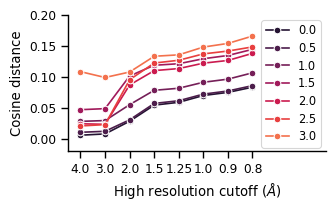

In [64]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, ax2 = plt.subplots(1,1,figsize=(3.45,2.2))

with open('real_data_analysis', 'rb') as file:
    all_results = pickle.load(file)

print(all_results)

df = pd.DataFrame(columns=all_results.keys(), index=all_results['0.0'].keys())

for noise, data in all_results.items():
    for res, distance in data.items():
        df[noise][res]=list(distance.values())[0]

for noise in df.columns:
    sns.lineplot(x=np.arange(0,len(df.index),1), y=df[noise], label=noise, marker='o')
    
ax2.set_xlabel(r'High resolution cutoff ($\AA$)')
ax2.set_ylabel(r'Cosine distance')
ax2.set_xlim(-0.5,len(df.index)+2)
ax2.set_xticks(np.arange(0,len(df.index),1), labels=df.index)
sns.set_palette(sns.color_palette("rocket", len(df.index)+1))
ax2.legend(prop={'size': 8.2})
ax2.set_ylim(-0.02,0.2)
ax2.get_legend()
fig.tight_layout()
sns.despine()
sns.set_context('paper')


In [369]:
import structure_match, importlib, pickle
from pathlib import Path
import numpy as np
import io

importlib.reload(structure_match)

reslimits = [(999, float(i)) for i in [4, 3, 2, 1.5, 1.25, 1, 0.9, 0.8]]

cusps = Path('test_data/cusp/').glob('*.cif')

results = {}

for cusp in cusps:
    results[cusp.stem] = {}
    for reslimit in reslimits:
        print(f"Calculating structure factors using resolution {str(reslimit)}")
        results[cusp.stem][float(reslimit[1])] = structure_match.StructureMatch().compare_fs(
            Path(f'test_data/cusp/{cusp.stem}.hkl'), 
            Path(f'test_data/cusp/{cusp.stem}.cif'), 
            Path('test_data/th5/').glob('100020030612864.cif'),
            resolution_limit=reslimit)

with open('cusp_analysis', 'wb') as file:
    pickle.dump(results, file)

Calculating structure factors using resolution (999, 4.0)
Calculating structure factors using resolution (999, 3.0)
Calculating structure factors using resolution (999, 2.0)
Calculating structure factors using resolution (999, 1.5)
Calculating structure factors using resolution (999, 1.25)
Calculating structure factors using resolution (999, 1.0)
Calculating structure factors using resolution (999, 0.9)
Calculating structure factors using resolution (999, 0.8)
Calculating structure factors using resolution (999, 4.0)
Calculating structure factors using resolution (999, 3.0)
Calculating structure factors using resolution (999, 2.0)
Calculating structure factors using resolution (999, 1.5)
Calculating structure factors using resolution (999, 1.25)
Calculating structure factors using resolution (999, 1.0)
Calculating structure factors using resolution (999, 0.9)
Calculating structure factors using resolution (999, 0.8)
Calculating structure factors using resolution (999, 4.0)
Calculating 

{'10deg_auto': {4.0: {'100020030612864.cif': 0.012746791898516796}, 3.0: {'100020030612864.cif': 0.02030577615149709}, 2.0: {'100020030612864.cif': 0.0298053361845404}, 1.5: {'100020030612864.cif': 0.0400618704042206}, 1.25: {'100020030612864.cif': 0.05188355280123047}, 1.0: {'100020030612864.cif': 0.06623509693277019}, 0.9: {'100020030612864.cif': 0.07104284864635246}, 0.8: {'100020030612864.cif': 0.07265803708479357}}, '15deg_auto': {4.0: {'100020030612864.cif': 0.009697843559163588}, 3.0: {'100020030612864.cif': 0.01735065038324224}, 2.0: {'100020030612864.cif': 0.033026281608458885}, 1.5: {'100020030612864.cif': 0.046053491365504184}, 1.25: {'100020030612864.cif': 0.05514526314487844}, 1.0: {'100020030612864.cif': 0.060878195438496374}, 0.9: {'100020030612864.cif': 0.060878195438496374}, 0.8: {'100020030612864.cif': 0.060878195438496374}}, '20deg_auto': {4.0: {'100020030612864.cif': 0.009989672182987408}, 3.0: {'100020030612864.cif': 0.01711051685060283}, 2.0: {'100020030612864.cif

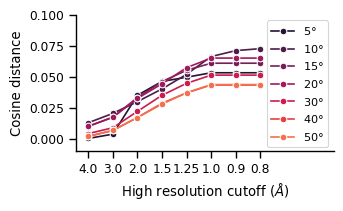

In [67]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from natsort import natsorted
import re

fig, ax2 = plt.subplots(1,1,figsize=(3.45,2.2))

with open('cusp_analysis', 'rb') as file:
    all_results = pickle.load(file)

print(all_results)

df = pd.DataFrame(columns=all_results.keys(), index=all_results['10deg_auto'].keys())

for cusp, data in all_results.items():
    for res, distance in data.items():
        df[cusp][res]=list(distance.values())[0]

regex ='(\d*)'
for cusp in natsorted(df.columns):
    sns.lineplot(x=np.arange(0,len(df.index),1), y=df[cusp], label=f'{re.search(regex,cusp)[0]}$\degree$', marker='o')


    
ax2.set_xlabel(r'High resolution cutoff ($\AA$)')
ax2.set_ylabel(r'Cosine distance')
ax2.set_xlim(-0.5,len(df.index)+2)
ax2.set_xticks(np.arange(0,len(df.index),1), labels=df.index)
sns.set_palette(sns.color_palette("rocket", len(df.index)+1))
ax2.legend(prop={'size': 8.1})
ax2.set_ylim(-0.01,0.1)

fig.tight_layout()
sns.despine()
sns.set_context('paper')


In [ ]:
import structure_match, importlib, pickle
from pathlib import Path
import numpy as np
import io

importlib.reload(structure_match)

reslimits = [(999, float(i)) for i in [4, 3, 2, 1.5, 1.25, 1, 0.9, 0.8]]

cusps = Path('test_data/cusp/').glob('*.cif')

results = {}

for cusp in cusps:
    results[cusp.stem] = {}
    for reslimit in reslimits:
        print(f"Calculating structure factors using resolution {str(reslimit)}")
        results[cusp.stem][float(reslimit[1])] = structure_match.StructureMatch().compare_fs(
            Path(f'test_data/cusp/{cusp.stem}.hkl'), 
            Path(f'test_data/cusp/{cusp.stem}.cif'), 
            Path('test_data/th5/').glob('100020030612864.cif'),
            resolution_limit=reslimit)

with open('cusp_analysis', 'wb') as file:
    pickle.dump(results, file)

In [14]:
from pathlib import Path

from gemmi import cif

for f in Path('test_data/').glob('*.cif'):

    Path(f'test_data/{f.stem}').mkdir()

    bigcif = cif.read_file(str(f))

    for block in bigcif:
        block.write_file(filename=str(Path(f'test_data/{f.stem}') / block.name)+'.cif')


In [81]:
rlim = 4

import structure_match, importlib, pickle
from pathlib import Path

importlib.reload(structure_match)

results = structure_match.StructureMatch().compare_fs(
    Path('test_data/th5/exp_sx.hkl'), 
    Path('test_data/th5/exp.cif'), 
    Path('test_data/T2_Predicted_Structures/').glob('*.cif'), 
    resolution_limit=(999,rlim))


with open('t2_analysis_results_'+str(rlim), 'wb') as file:
    pickle.dump(results, file)

import structure_match, importlib, pickle
from pathlib import Path

importlib.reload(structure_match)

results = structure_match.StructureMatch().compare_fs(
    Path('test_data/th5/exp_sx.hkl'), 
    Path('test_data/th5/exp.cif'), 
    Path('test_data/T0_Predicted_Structures/').glob('*.cif'), 
    resolution_limit=(999,rlim))


with open('t0_analysis_results_'+str(rlim), 'wb') as file:
    pickle.dump(results, file)

import structure_match, importlib, pickle
from pathlib import Path

importlib.reload(structure_match)

results = structure_match.StructureMatch().compare_fs(
    Path('test_data/th5/exp_sx.hkl'), 
    Path('test_data/th5/exp.cif'), 
    Path('test_data/T1_Predicted_Structures/').glob('*.cif'), 
    resolution_limit=(999,rlim))


with open('t1_analysis_results_'+str(rlim), 'wb') as file:
    pickle.dump(results, file)

# import structure_match, importlib, pickle
# from pathlib import Path

# importlib.reload(structure_match)

# results = structure_match.StructureMatch().compare_fs(
#     Path('test_data/th5/exp_sx.hkl'), 
#     Path('test_data/th5/exp.cif'), 
#     Path('test_data/T2E_Predicted_Structures/').glob('*.cif'), 
#     resolution_limit=(999,3))


# with open('t2e_analysis_results', 'wb') as file:
#     pickle.dump(results, file)

In [16]:

import structure_match, importlib, pickle
from pathlib import Path

importlib.reload(structure_match)

results = structure_match.StructureMatch().compare_fs(
    Path('test_data/th5/exp_sx.hkl'), 
    Path('test_data/th5/exp.cif'), 
    Path('test_data/T0_Predicted_Structures/').glob('*.cif'), 
    resolution_limit=(999,0.8))


with open('t0_analysis_results', 'wb') as file:
    pickle.dump(results, file)

In [139]:

import structure_match, importlib, pickle
from pathlib import Path

importlib.reload(structure_match)

results = structure_match.StructureMatch().compare_fs(
    Path('test_data/th5/exp_sx.hkl'), 
    Path('test_data/th5/exp.cif'), 
    Path('test_data/trip3sez/').glob('*.cif'), 
    resolution_limit=(999,4))


with open('trip3sez_analysis_results', 'wb') as file:
    pickle.dump(results, file)
    
sorted(results.items(), key=lambda x: x[1])[:10]


[('2100277.cif', 0.052453195279334563),
 ('2100333.cif', 0.054798356831395445),
 ('2100329.cif', 0.05501967826083187),
 ('2100332.cif', 0.055183791721936215),
 ('2100276.cif', 0.0565610023247205),
 ('2100330.cif', 0.27957081294643416),
 ('2100334.cif', 0.293293617317015),
 ('2100336.cif', 0.2943540369947749),
 ('2100335.cif', 0.30246949358059494),
 ('2100331.cif', 0.3802401938498797)]

In [154]:

import structure_match, importlib, pickle
from pathlib import Path

importlib.reload(structure_match)

results = structure_match.StructureMatch().compare_fs(
    Path('test_data/th5/exp_sx.hkl'), 
    Path('test_data/th5/exp.cif'), 
    Path('test_data/h3bti/').glob('*.cif'), 
    resolution_limit=(999,5))


with open('h3bti_analysis_results', 'wb') as file:
    pickle.dump(results, file)
sorted(results.items(), key=lambda x: x[1])[:10]

[('60928work1p31c_nosolv.cif', 0.15646244621592642)]

f:\data\postdoc\csp-search\structure_match\.conda\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


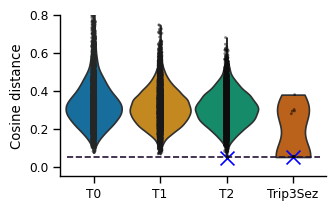

In [72]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xarray as xa

fig, ax2 = plt.subplots(1,1,figsize=(3.45,2.2))
reslimit = '4'

all_results = {'t0_analysis_results_'+str(reslimit): None, 't1_analysis_results_'+str(reslimit): None, 't2_analysis_results_'+str(reslimit): None, 'trip3sez_analysis_results': None}

for i in all_results.keys():
    with open(i, 'rb') as file:
        results = pickle.load(file)
    all_results[i] = results

#print(all_results['t1_analysis_results_0_8A'])
#print({k:list(v.values()) for k,v in all_results.items()})




sns.violinplot([list(v.values()) for k,v in all_results.items()], inner=None, ax=ax2, cut=0, palette=sns.color_palette("colorblind", 8), width=0.95)
sns.stripplot([list(v.values()) for k,v in all_results.items()], alpha=0.5, color='black', size=2, jitter=0.03)

ax2.scatter(x=2,y=all_results['t2_analysis_results_'+str(reslimit)]['-140.370_T2_41_6249.cif'], c='blue', marker='x', s=100)
ax2.scatter(x=3,y=all_results['trip3sez_analysis_results']['2100277.cif'], c='blue', marker='x', s=100)

ax2.set_xticklabels(['T0', 'T1', 'T2', 'Trip3Sez'])
ax2.set_xlim(-0.5,3.5)
ax2.set_ylim(-0.05,0.8)
ax2.hlines(y=0.05, xmin=-0.4, xmax=3.4, linestyles='dashed')
ax2.set_ylabel(r'Cosine distance')
fig.tight_layout()

sns.despine()
sns.set_context('paper')



In [163]:
sorted(all_results['t2_analysis_results_4'].items(), key=lambda x: x[1])[:10]

[('-140.370_T2_41_6249.cif', 0.049150986579251654),
 ('-129.323_T2_167_18508.cif', 0.051774669514211724),
 ('-138.277_T2_14_6182.cif', 0.05263554320920938),
 ('-132.389_T2_167_10388.cif', 0.05731262697896056),
 ('-126.648_T2_52_11057.cif', 0.06069893783188329),
 ('-161.910_T2_5_2099.cif', 0.07560741303421536),
 ('DEBXIT01.cif', 0.077316079511497),
 ('-142.868_T2_167_1443.cif', 0.07833270244723134),
 ('-175.810_T2_60_943.cif', 0.0789377942456756),
 ('-146.322_T2_110_6775.cif', 0.07997798103207576)]

{'1000200300210082.cif': 0.348709463038944, '1000200300210095.cif': 0.5617302717393158, '1000200300210271.cif': 0.2212665367978034, '1000200300210380.cif': 0.20785211504448609, '1000200300210481.cif': 0.4165478359179886, '10002003002105.cif': 0.24279191938136402, '1000200300210606.cif': 0.4144723860301588, '1000200300210647.cif': 0.276174633074839, '1000200300210655.cif': 0.24383939495579732, '100020030021067.cif': 0.3593189376417887, '1000200300210744.cif': 0.15516893541625354, '1000200300210763.cif': 0.17296636542096133, '1000200300210981.cif': 0.34306415322645234, '100020030021101.cif': 0.1656450280467705, '1000200300211110.cif': 0.47892914049325086, '1000200300211340.cif': 0.2049429810524982, '1000200300211456.cif': 0.26812497134383617, '100020030021146.cif': 0.26029504053980324, '1000200300211598.cif': 0.24442981964258492, '1000200300211626.cif': 0.3180592108338113, '1000200300211674.cif': 0.20588096230788167, '1000200300211705.cif': 0.18180150035668163, '1000200300211721.cif': 0.

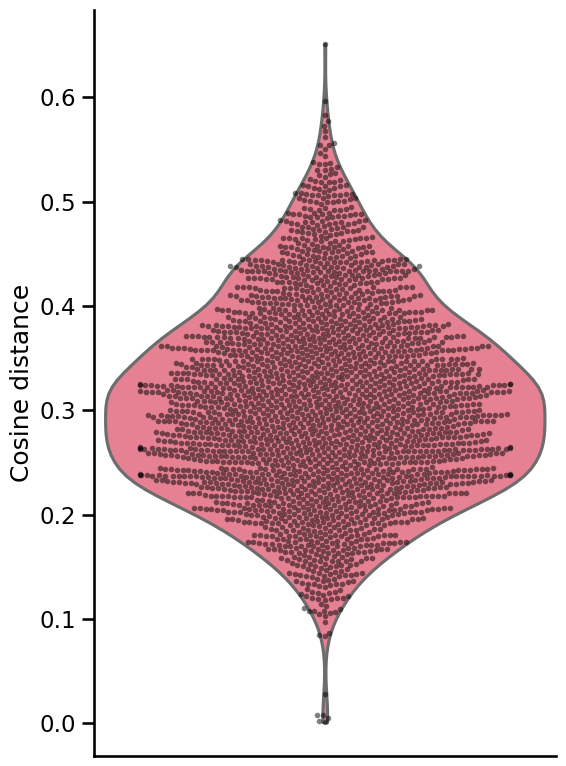

In [190]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xarray as xa

fig, ax2 = plt.subplots(1,1,figsize=(6,8))
reslimit = '4'

all_results = {'resolution_analysis_results': None}


for i in all_results.keys():
    with open(i, 'rb') as file:
        results = pickle.load(file)
    all_results[i] = results

all_results = all_results['resolution_analysis_results']['cosine_distance'][4.0]
print(all_results)

#print(all_results['t1_analysis_results_0_8A'])
#print({k:list(v.values()) for k,v in all_results.items()})




sns.violinplot([v for k,v in all_results.items()], inner=None, ax=ax2, cut=0, palette=sns.color_palette("husl", 8), width=0.95)
sns.swarmplot([v for k,v in all_results.items()], alpha=0.5, color='black', size=4)

ax2.set_xticks([])
ax2.set_ylabel(r'Cosine distance')
fig.tight_layout()

sns.despine()
sns.set_context('talk')

